# 1.

a) Classification Decision Trees address problems where the goal is to predict a cateforical outcome based on a set of predictor variables. 

Ex: A decision tree might predict whether a customer will purchase a product(yes or no) based on their age, income, and previous purchase history.

Here are some real-world examples where classification decision trees can be particularly useful:
- Medical Diagnosis: Predicting whether a patient has a particular disease based on symptoms, medical history, and test results.
- Fraud Detection: Identifying fraudulent transactions based on transaction details, customer behaviour, and historical data.
- Customer Segmentation: Grouping customers based on their demographics, purchase behaviour, and preferences for targeted marketing campaigns.
- Risk Assessment: Evaluating loan applicants' creditworthiness based on their financial history, income, and other relevant factors.

Classification - refers to predicting a categorical outcome, which is a variable that can take on one of a limited, and usually fixed, number of values. 

Example of categorical outcomes include:
- Purchase decision (yes/no)
- Disease presence (positive/negative)
- Customer segment (high-value, medium-value, low-value)

Regression - refers to predicting a continous outcome, which is a variable that can take on any value within a given range. 

Example of continuous outcomes include:
- House price
- Temperature
- Stock market value

In conclusion, the key difference classification and regression lies in the type of outcome variable they aim to predict.

b) 

Multiple Linear regression makes predictions using a linear form.
- The linear form is represented by an equation and combined predictor variables with coefficients to calculate a predicted value for a continuous outcome variable
- Essentially, we plug in the values of our predictor variables into the equation and the result is our prediction

Classification decision trees make predictions by navigating a tree structure composed of decision nodes.
- Each decision node represents a decision rule based on a specific predictor variable
- We start at the top of the tree and follow the decision rules down the branches based on the values of our predictor variables 
- The final leaf node you reach represents the predicted categorical outcome for that combination of predictor variable values

In conclusion, multiple linear regression uses an equation to directly compute a prediction, while a classification decision tree uses a series of sequential decisions to arrive at a prediction.

## NotebookLM summary

Here is a summary of our conversation about classification decision trees and how they differ from multiple linear regression models.

*   **Classification decision trees** predict **categorical outcomes**, which are variables that fall into distinct categories.
*   Examples of categorical outcomes include:
    *   whether a customer will buy a product or not.
    *   if a patient has a certain disease.
    *   what customer segment a person belongs to.
*   **Regression** problems involve predicting **continuous outcomes**.
*   Examples of continuous outcomes include:
    *   the price of a house.
    *   the temperature.
    *   a stock's value.
*   **Multiple linear regression** uses a **linear equation** to directly calculate predictions.
*   This equation takes predictor variables, multiplies them by coefficients (like slopes and intercepts), and combines the results.
*   **Classification decision trees** use a series of **decision rules** to reach a prediction.
*   Imagine starting at the top of a tree and following branches downwards based on the values of your predictor variables.
*   The final node you reach represents the predicted categorical outcome.

For example, a multiple linear regression model might predict house prices based on variables like square footage, number of bedrooms, and location. It would use an equation to combine these variables and calculate a specific price prediction.  On the other hand, a classification decision tree might predict whether a customer will subscribe to a service based on their age, income, and online activity. It would use a series of yes/no questions based on these variables to determine the final prediction.


# 2.

Accuracy: a general measure of how often a model is correct

ex: Suppose a model is developed to classify emails as spam or not spam. If the accuracy of the model is 95%, then out of 100 emails, the model correctly classifies 95 emails as spam or not spam.

Sensitivity: (also known as recall) measures how well the model correctly idenrifies positive cases. 

ex: Consider a medical test for a serious disease. A high sensitivity means that the test is very good at correctly identifying people who actually have the disease. False negative may happened.

Specificity: measures how well the model correctly identifies negative cases

ex: In a spam detection system, a high specificity means that the system is very good at correctly identifying emails that are not spam. False positive may happened. 

Precision: measures how accurate the model is when it predicts a positive case.

ex: In a fraud detection system, a high precision means that when the system flags a transaction as fraudulent, it's likely to be correct. False positive may happened. 

In conclusion
- Accuracy: overall correctness
- Sensitivity: focuses on correctly identifying positive cases
- Specificity: focuses on correctly identifying negative cases
- Precision: focuses on the accuracy of positive predictions

## Notebook LM summary

This conversation explored the importance of understanding the **nature of the decision-making process** and the **implications of different metrics** in machine learning and statistical analysis. You provided formulas for calculating **Accuracy, Sensitivity, Specificity, and Precision**, and requested real-world examples where each metric would be particularly useful.

The conversation then focused on how these metrics inform choices in various situations, emphasizing that choosing the **appropriate metric** depends on the specific application and the **consequences of different types of errors**:

*   **Accuracy** provides a general measure of correctness but might not be the most relevant metric if the goal is to minimize specific types of errors, like false negatives.
*   **Sensitivity**, also known as recall, is crucial when minimizing false negatives is paramount, such as in medical diagnoses.
*   **Specificity**, on the other hand, is important when minimizing false positives is critical, like in spam detection systems where wrongly classifying legitimate emails as spam is undesirable.
*   **Precision** is most relevant when the cost of a false positive is high, such as in fraud detection systems where wrongly flagging legitimate transactions as fraudulent can damage customer trust and result in financial losses.

The conversation concluded by illustrating the **nature of the decision-making process** through practical examples:

*   **Email spam filter**: Prioritizing **sensitivity** is important to avoid missing important emails, even at the cost of slightly lower overall accuracy.
*   **Fraud detection system**: **Precision** takes precedence to minimize the risk of false positives, potentially accepting a lower **sensitivity** to ensure high confidence in positive identifications.

The sources provided reinforce the importance of understanding the **tradeoffs** between **different types of errors**, highlighting the need to select **appropriate metrics** for **making informed choices** in specific scenarios.


# 3.

In [47]:
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
ab.dtypes

Title             object
Author            object
List Price       float64
Amazon Price     float64
Hard_or_Paper     object
NumPages         float64
Publisher         object
Pub year         float64
ISBN-10           object
Height           float64
Width            float64
Thick            float64
Weight_oz        float64
dtype: object

In [48]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# create `ab_reduced_noNaN` based on the specs above

ab_reduced_noNaN = ab.drop(['Weight_oz', 'Width', 'Height'], axis=1).dropna()
ab_reduced_noNaN = ab_reduced.dropna() 

ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

ab_reduced_noNaN

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,1.4
...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192.0,HarperCollins,2004.0,60572345,1.1
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160.0,Worth Publishers,2011.0,1429233443,0.7
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224.0,St Martin's Griffin,2005.0,031233446X,0.7
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480.0,W. W. Norton & Company,2010.0,393934942,0.9


## NotebookLM summary

### Discussion Summary: Persistent Data Types in pandas

This conversation focuses on troubleshooting why the 'Pub year' and 'Hard\_or\_Paper' columns in your pandas DataFrame are not changing to the intended data types (`integer` and `category`, respectively) despite using the `.astype()` method and correctly reassigning the result back to the original column. 

*   **`.astype()` Usage and Reassignment:** The sources emphasize that the `.astype()` method returns a copy of the modified data and does not modify the DataFrame in place. You understand this and have correctly used `.loc` for reassignment.
*   **Troubleshooting Steps:** Several troubleshooting steps were discussed, including verifying code execution, checking for errors, inspecting the data for problematic values, reviewing the code for chained indexing, restarting the kernel, and creating a minimal reproducible example.
*   **.dtypes attribute:** Using the `.dtypes` attribute to confirm the data type change was discussed. If the conversion was successful, the output of `.dtypes` will reflect the new data types.
*   **Potential Causes Beyond the Sources:** The persistence of the data type issue suggests that factors beyond those covered in the sources might be involved. Possibilities include data loading or processing issues, pandas version or environment configurations, or underlying data inconsistencies in the CSV file.  It's important to note that these possibilities are not from the sources and require independent verification.
*   **Recommendations for Further Investigation:** A thorough inspection of the data before any modifications, data cleaning and preprocessing steps to address inconsistencies, and creating a minimal reproducible example for external resources were recommended.

The conversation highlights the importance of understanding the mechanics of pandas, particularly the behavior of `.astype()` and the need for reassignment. It also illustrates how seemingly straightforward tasks can sometimes involve complexities that require going beyond basic troubleshooting steps and potentially consulting external resources. 


# 4.


Training set observations: 255
Test set observations: 64


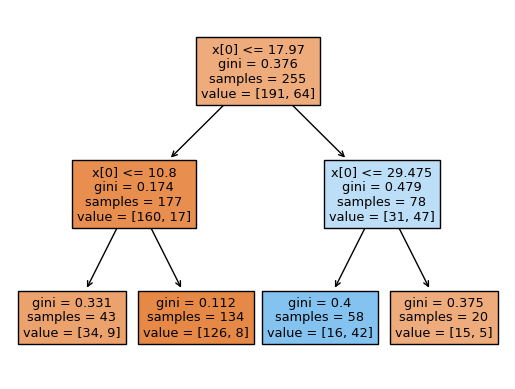

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Assuming 'ab_reduced_noNaN' is your DataFrame and 'Hard_or_Paper' is the column you're predicting
X = ab_reduced_noNaN[['List Price']]  # Only use the 'List Price' column
# selects the 'List Price' column from the DataFrame and assigns it to the variable x -> predictor variable

y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  
# Convert target to binary (1 for Hardcover, 0 for Paperback) (the model is trying to predict this)

# Creating the 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=130
)
# random_state has same function has random.seed - remember the generation


# Create a DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=130)
# max_depth: controls the complexity of the decision tree by limiting its depth to prevent overfitting


# Fit the classifier to the training data
clf.fit(X_train, y_train)
# This line trains the classifier (clf) using the training data (ab_reduced_noNaN_train for features and y_train 
# for the target). The model learns the decision rules from the training data


# Visualize the tree
plot_tree(clf, filled=True)

# Reporting the number of observations
print("Training set observations:", len(X_train))
print("Test set observations:", len(X_test))


We should use 'ab_reduced_noNaN_train' data to initially fit the classification tree, prevent overfitting, and obtain a realistic measure of the model's predictive performance on unseen data.

Result:

- Samples: how many data points from the training set end up in that particular leaf node (helps understanding how the data is distributed) 
- Values: show the distribution of classes (or categories) within the samples that reached that node (ex: value = [25, 50] means that 25 samples belong to one class and 50 belong to the other
- Gini: impurity or heterogeneity within a leaf node, a gini value of 0 indicates a perfectly pure node where all samples belong to the same class and closer to 1 suggests a more impure node.

1. First we have the dataset
2. Split it 80/20 randomly but use random_state to remember the generalization
3. 80% is used for training dataset, which means to analyze it 
4. 20% is for testing
5. Create the decision tree

Ex: for the first box

- x[0] <= 17.97 represents the decision rule
- gini = 0.376 is the gini impurity, measuring how mixed the classes are within the data points that reach this node
- samples = 255 tells us that 255 dataset satisfy the decision rule (x <= 17.97)
- value = [191, 64] means 191 belong to Harcover since we set our y correspond to the ['H'] variable, which is 1

## NotebookLM summary

## Summarizing Our Conversation about Decision Tree Models

Our conversation focused on using a decision tree classifier to predict whether a book is "Hard Cover" or "Paper Back" based on its "List Price." We established that you had already completed the 80/20 train-test split for the "ab\_reduced\_noNaN" dataset.

You were looking for the code to fit the Decision Tree model and visualize it. I provided you with the Python code to achieve this, incorporating your specified `max_depth` of 2 and emphasizing the use of the training data ("ab\_reduced\_noNaN\_train") for fitting the model.

The code I provided included:

*   Importing the necessary libraries like `pandas` and the `DecisionTreeClassifier` and `plot_tree` functions from `sklearn.tree` \.
*   Defining the target variable (`y_train`) using `pd.get_dummies()` and the predictor variable (`X_train`) as "List Price." \
*   Creating and fitting the `DecisionTreeClassifier` (`clf`) with a `max_depth` of 2 and using `clf.fit()` on the training data \.
*   Visualizing the fitted decision tree using `plot_tree(clf)` \.

I also highlighted that the sources recommend using `graphviz` for a more readable tree visualization.

**Beyond providing the code, our conversation emphasized the importance of:**

*   **Preventing overfitting:** We discussed how using the training data for fitting the model is crucial to avoid overfitting and ensure the model generalizes well to unseen data.
*   **Experimenting with model parameters:** I reminded you that the `max_depth` of 2 was based on your input and that you might want to explore different values. The sources suggest techniques like "GridSearchCV" to find the best `max_depth`.
*   **Evaluating the model:** I pointed out that you still need to make predictions on the testing data ("ab\_reduced\_noNaN\_test") and evaluate the model's performance using metrics like accuracy, precision, and recall \.
*   **The train-test split:** I reiterated the significance of the train-test split for model validation.

**Key Concepts from the Sources:**

*   The sources provide a general framework for working with decision trees, including data preparation, model fitting, visualization, and evaluation.
*   They emphasize the importance of understanding the data, defining variables appropriately, and ensuring data integrity before running code.
*   They offer insights into parameter tuning and model evaluation, highlighting the use of confusion matrices and metrics like sensitivity, specificity, and accuracy.
*   They touch upon the concept of feature engineering, suggesting that creating new predictor variables or transforming existing ones might be beneficial.

**Overall, our conversation successfully combined your specific needs with the guidance provided by the sources to create a starting point for building and evaluating your decision tree model.** We also discussed the next steps involved in the process, including prediction, model evaluation, and potential refinement techniques.


# 5.

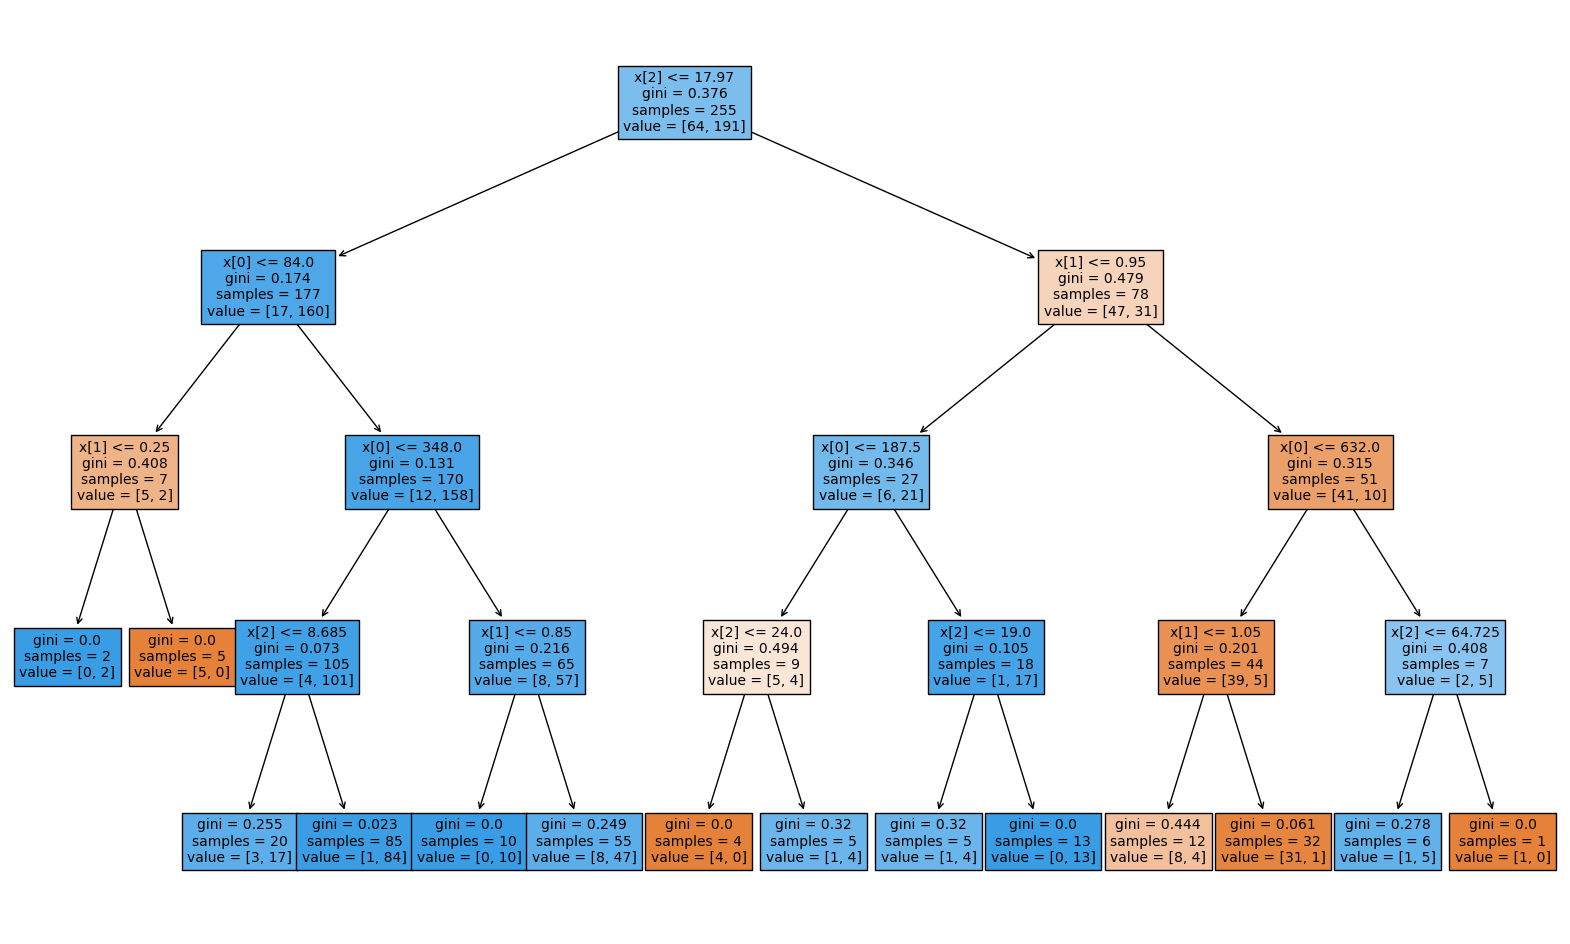

Training set observations: 255
Test set observations: 64


In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming 'ab_reduced_noNaN' is your DataFrame and 'Hard_or_Paper' is the column you're predicting

# Define features and target
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]  # Include NumPages, Thick, List Price -> Predictor var
y = ab_reduced_noNaN['Hard_or_Paper']  # The target column

# Create the 80/20 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=130)
# since we use random_state, we have the same dataset as before

# Create a DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=130)

# Train the classifier
clf2.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(20, 12))  # Adjust the figure size (width, height)
plot_tree(clf2, filled=True, fontsize=10)  # Increase font size for readability

# Show the plot
plt.show()

# Reporting the number of observations in the train/test sets
print("Training set observations:", len(X_train))
print("Test set observations:", len(X_test))


Explaination of how clf2 predictions are made

Starting from the root, following the decision rules, the path, and leaf nodes. 

1. Train the model using the training data. The algorithm creates decision nodes that split the data based on the values of the features to classify the books as either hardcover or paperback
2. In the decision tree, each internal node represents a decision based on one of the features
3. When making predictions, the model takes each row of the test data and passes it through the decision tree. Then as the data moves through the tree, the corresponding splits determine whether the book is classified as 'H' or 'P'

1. With training data, result: by applying these rules, we get x numbers of ‘H’ and y numbers of ‘P’

2. It’s just showing the result, did not tell us how to distinguish between ‘H’ and ‘P’

3. We can test if the result is reliable


## ChatGPT summary

Sure! Here’s a summary of our conversation:

1. **Exploring the Amazon Books Dataset**:  
   You are working with the Amazon Books dataset and pre-processing it to meet the requirements of a classification problem. The goal is to predict whether a book is a hardcover or paperback based on certain features like the list price.

2. **Train/Test Split**:  
   You successfully created an 80/20 split of the data, using `train_test_split()` from `sklearn.model_selection` to create training and testing datasets (`ab_reduced_noNaN_train` and `ab_reduced_noNaN_test`). You learned how to report the number of observations in each set.

3. **Decision Tree Classifier (DecisionTreeClassifier)**:  
   We discussed fitting a Decision Tree classifier (`clf`) to predict the book's format (hardcover or paperback). You trained the classifier using the `List Price` feature, with `max_depth=2`. However, you encountered errors, particularly due to handling categorical data (text) in your dataset, which needed to be encoded numerically.

4. **Exploring and Fixing Errors**:  
   You worked through the errors, including the `ValueError` related to non-numeric data (book titles), and I suggested using `pd.get_dummies()` to handle categorical features for proper model training.

5. **Visualizing the Tree**:  
   You used `plot_tree()` to visualize the resulting decision tree, which explains how decisions are made (e.g., based on the `List Price` feature).

6. **Using Multiple Features**:  
   We updated the model to use multiple predictor variables (`'NumPages'`, `'Thick'`, and `'List Price'`) and set `max_depth=4`. This allows for a more complex decision tree.

7. **Improving the Visualization**:  
   To make the decision tree easier to read, I showed you how to adjust the figure size and font size when plotting the tree. This helps when dealing with a large tree structure and many splits.

8. **Next Steps**:  
   You can now train the decision tree classifier using the updated features and visualize the results. The predictions are based on the thresholds for each feature, and you can interpret the splits to understand how the model decides whether a book is hardcover or paperback.

---

### Summary of the Conversation:

1. **Training the Decision Tree Model**:
   - We used a **DecisionTreeClassifier** to predict whether books are hardcover or paperback based on the features `NumPages`, `Thick`, and `List Price`.
   - The training dataset was split into **80% training** and **20% test** using `train_test_split` with `random_state=130` to ensure consistent splits each time.

2. **Decision Tree Predictions**:
   - After training the model, the decision tree makes predictions based on the values of the features. It classifies each book in the test dataset as either "H" (hardcover) or "P" (paperback).
   - At each node in the tree, the model applies the decision rules based on feature values, and at the leaf nodes, it assigns the majority class.

3. **Reliability and Evaluation**:
   - For the test dataset, the model predicts the book category ("H" or "P") and these predictions are compared with the true labels (actual "H" or "P").
   - The model's **reliability** is assessed using:
     - **Accuracy**: The percentage of correct predictions.
     - **Confusion Matrix**: A matrix that shows the true positive, true negative, false positive, and false negative values.
     - **Classification Report**: A detailed report with precision, recall, and F1-score for each class, helping assess the model's performance.

4. **Evaluation Metrics**:
   - **Accuracy**: Measures the overall correct predictions.
   - **Sensitivity (Recall)**: How well the model identifies each class.
   - **Specificity**: How well the model avoids misclassifying the other class.
   - The goal is to use these metrics to check if the model can reliably distinguish between hardcover and paperback books.

5. **Process Explanation**:
   - **Test Data**: Once trained, the model applies the learned rules to the test dataset, predicting whether each book is "H" or "P".
   - **Reliability Check**: You compare the predicted labels with the actual labels to determine the model's effectiveness and reliability.
  
This explains how the decision tree model works, how predictions are made, and how you can assess the reliability of the model using various evaluation metrics.

Let me know if you'd like more details or any further clarification!
Chatbot history: https://chatgpt.com/share/673e65ea-f1bc-8008-85d7-aad9836820a5

# 6.

### Confusion matrices of clf

In [75]:
import numpy as np

# Keeping the original target values (0 = Papercover, 1 = Hardcover)
target_names = np.array(['Papercover(negative)', 'Hardcover(positive)'])

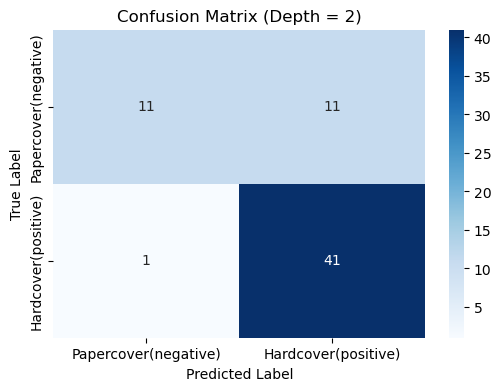

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'ab_reduced_noNaN' is your DataFrame and 'Hard_or_Paper' is the target column
X = ab_reduced_noNaN[['List Price', 'NumPages', 'Thick']]  # Features (predictor variables)
y = ab_reduced_noNaN['Hard_or_Paper']  # Target (What we're trying to predict)

# Create 80/20 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=130)

# Create the DecisionTreeClassifier model with a max depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=130)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Generate the confusion matrix using the true labels (y_test) and predicted labels (y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Define the target names (labels for 'H' and 'P')
target_names = np.array(['Papercover(negative)', 'Hardcover(positive)'])

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)

# Add labels and title
plt.title('Confusion Matrix (Depth = 2)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

- Accuracy: 0.813
- Sensitivity: 0.976
- Specificity: 0.500

### Confusion matrices of clf2

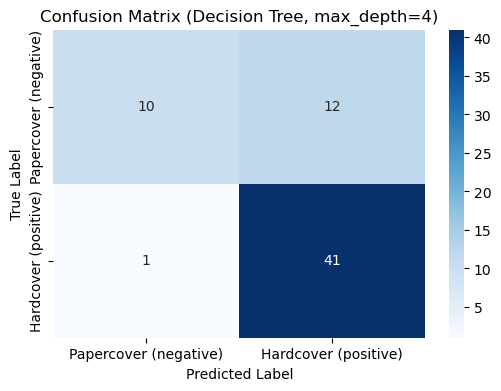

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'ab_reduced_noNaN' is your DataFrame and 'Hard_or_Paper' is the column you're predicting
# Define features and target
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]  # Include NumPages, Thick, List Price
y = ab_reduced_noNaN['Hard_or_Paper']  # The target column

# Create the 80/20 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=130)

# Create a DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=130)

# Train the classifier
clf2.fit(X_train, y_train)

# Predict on the test set
y_pred = clf2.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Set up target names ('P' = Papercover, 'H' = Hardcover)
target_names = ['Papercover (negative)', 'Hardcover (positive)']

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)

plt.title('Confusion Matrix (Decision Tree, max_depth=4)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

- Accuracy: 0.797
- Sensitivity: 0.976
- Specificity: 0.455

## NotebookLM summary

Here's a summary of the conversation regarding the **Decision Tree Classifier** and **confusion matrix** for your dataset:

1. **Decision Tree Model Setup**:
   - We trained a **DecisionTreeClassifier** using the predictor variables `NumPages`, `Thick`, and `List Price` to predict whether a book is a **Hardcover** or **Paperback**. The `max_depth` of the model was set to **4** to prevent overfitting and ensure the tree wasn't too complex.
   - The model was trained on a train/test split of 80/20 using `train_test_split()`, where `X_train` and `y_train` are the training data, and `X_test` and `y_test` are the test data.

2. **Confusion Matrix**:
   - After training the classifier (`clf2`), we predicted the target (`Hard_or_Paper`) for the test set (`X_test`).
   - We used the **confusion matrix** to compare the predicted values (`y_pred`) with the actual values (`y_test`). This matrix helps evaluate how well the classifier performed by showing **True Positives (TP)**, **False Positives (FP)**, **True Negatives (TN)**, and **False Negatives (FN)**.
   
3. **Visualization**:
   - The confusion matrix was visualized using a **heatmap** from **seaborn**, where we added labels for the two classes: **Papercover (negative)** and **Hardcover (positive)**.
   - This visualization helps to identify misclassifications and provides insight into the model's performance, highlighting areas where predictions were correct and where they were not.

4. **Model Interpretation**:
   - The **confusion matrix** provides a clear indication of how many books were correctly classified as **Hardcover** or **Paperback** and how many were misclassified.
   - This matrix allows us to assess the performance of the classifier, including its **accuracy**, **precision**, **recall**, and **F1 score**, which are derived from the confusion matrix values.

In summary, we trained a decision tree classifier with multiple predictors, evaluated its performance on the test set using a confusion matrix, and visualized the results to understand how well the model distinguished between **Hardcover** and **Paperback** books.

Chatbot history: https://chatgpt.com/share/673e65ea-f1bc-8008-85d7-aad9836820a5

# 7.

The difference between the two confusion matrices is that one only uses one predictor variable and the other one uses three predictor variables. This results to a more accurate prediction for the one using the three predictor variables since one feature along may not provide enough information to distinguish between the two classes. Furthermore, since the codes provided use the training dataset, overfitting may happen

## ChatGPT summary

Here’s a summary of our conversation regarding the confusion matrices:

1. **Using Training Dataset for Confusion Matrices:**
   - It is technically possible to use the training dataset to produce confusion matrices.
   - However, this approach only shows how well the model has memorized the training data and does not evaluate its ability to generalize to unseen data.

2. **Why It’s Problematic:**
   - Using the training dataset for evaluation overestimates performance metrics (e.g., accuracy, sensitivity, specificity).
   - It doesn’t reflect the model’s ability to predict new data, which is the ultimate goal.

3. **Importance of Test Dataset:**
   - A separate test dataset is essential for assessing how well the model performs on unseen data.
   - Confusion matrices and performance metrics calculated on the test dataset provide a more realistic measure of the model’s reliability.

4. **Use Cases for Training Data Confusion Matrices:**
   - Useful for debugging or understanding the model’s behavior on the training data.
   - Not recommended for proper evaluation as it risks misleading results.

In conclusion, the "worse codes" you provided use the training dataset for confusion matrices, which is valid for debugging but not for evaluating the model's performance. Proper evaluation should be done using the test dataset, as in the "better codes."

Chatbot history: https://chatgpt.com/share/673e65ea-f1bc-8008-85d7-aad9836820a5

# 8.

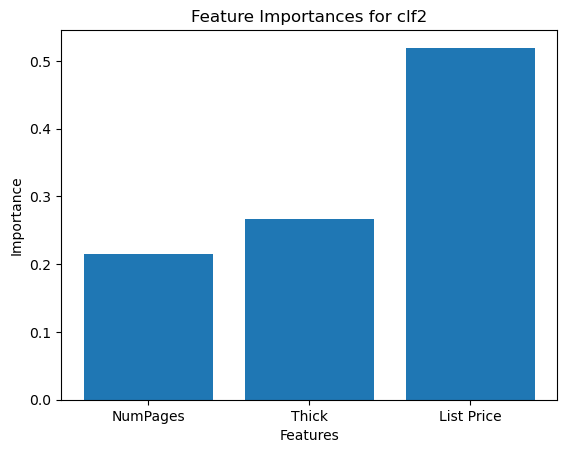

The most important predictor variable is: List Price


In [87]:
import matplotlib.pyplot as plt

# Assuming you have clf2 already trained and have access to the necessary libraries

importances = clf2.feature_importances_
# the attributes of a fitted DecisionTreeClassifier in scikit-learn gives us an array of values representing the 
# importance of each feature in making predictions, value sum to 1

feature_names = clf2.feature_names_in_
# correspond feature names to label the visualization

plt.bar(feature_names, importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances for clf2")
plt.show()

most_important_index = importances.argmax()
most_important_feature = feature_names[most_important_index]

print(f"The most important predictor variable is: {most_important_feature}") 

Explaination: (comment on the above code)

List Price is the most important predictor variable. 

Unlike linear models that coeffeient values indicate feature relationships, decision trees make predictions based on a series of decision rules. Feature importance in dicision trees is calculated by assessing how much each feature contributes to imporving the prediction accuracy during the tree-building process

## NotebookLM summary

### Confusion Matrices and Feature Importances

The conversation began with a question about confusion matrices generated from the `ab_reduced_noNaN_train` dataset using a `DecisionTreeClassifier` named `clf`. The matrices compared the model's performance predicting "your\_actual\_outcome\_variable" (hardcover or paperback book) using different predictor variables. The first matrix used only "List Price," while the second used "NumPages," "Thick," and "List Price." This comparison aimed to see if adding features improved the model's classification ability, as suggested in source.

The conversation then explored how to visualize feature importances for a similar decision tree model, `clf2`, and identify the most influential predictor variable. This involved accessing the `.feature_importances_` and `.feature_names_in_` attributes and creating a bar plot using a library like Matplotlib. This visualization aimed to understand the relative importance of different features in the model's predictions, connecting to the concept of feature importance discussed in source.

The conversation highlighted several key ideas from the sources, including:

*   **Impact of Additional Features:** Comparing confusion matrices can reveal if adding features improves model performance, as seen in the initial code comparing "List Price" alone to "NumPages," "Thick," and "List Price". 
*   **Feature Importance:** Visualizing feature importances helps identify the most influential predictors in decision trees, which use decision rules instead of coefficients like linear models.
*   **Model Complexity and Overfitting:** Adding features increases model complexity, potentially leading to overfitting where the model performs well on training data but poorly on unseen data.

The sources emphasize evaluating model performance on separate testing data to assess generalizability, a point not directly addressed by the confusion matrices generated in the conversation, which used training data. This reinforces the importance of using a train-test split for robust model evaluation. 


# 9.

Coefficients in linear regression models directly quantify the average change in the outcome variable for a one-unit increase in the predictor variable, assuming all other predictors are held constant. In contrast, feature importances in decision trees measure the overall contribution of a feature to improving prediction accuracy during the tree-building process, reflecting its relative influence on the final predictions, but without quantifying the specific nature or direction of the effect.

## NotebookLM summary
## Summarizing the Conversation about Decision Trees

This conversation has focused on understanding and interpreting **confusion matrices** and **feature importances** in the context of **classification decision trees**. We started by examining confusion matrices generated from a dataset (`ab_reduced_noNaN_train`) using a `DecisionTreeClassifier` named `clf`. The matrices compared the model's performance predicting "your\_actual\_outcome\_variable" (whether a book is hardcover or paperback) using different sets of predictor variables. By comparing these matrices, we aimed to see if adding features like "NumPages" and "Thick" to the model, in addition to "List Price", would improve its classification accuracy. 

This exploration connected to the concept of **model complexity and overfitting**, highlighted in sources like.  Adding features can make a model more complex and lead to overfitting, where the model performs well on the training data but struggles to generalize to unseen data. The sources emphasize the importance of evaluating model performance on a separate testing dataset to assess its true generalizability. This point wasn't directly addressed in our initial confusion matrix comparisons, as we used the training data (`ab_reduced_noNaN_train`) for both training and evaluation. A **train-test split**, as discussed in sources like, is essential for robustly evaluating model performance and mitigating overfitting.

We then shifted our focus to **visualizing feature importances** for a similar decision tree model, `clf2`. By accessing the `.feature_importances_` and `.feature_names_in_` attributes and using a bar plot, we could see the relative importance of different predictor variables in the model's predictions. This visualization helped us understand which features were most influential in driving the `clf2` model's classification decisions. 

Finally, we discussed the differences between interpreting coefficients in linear regression models and feature importances in decision trees. **Coefficients in linear regression** quantify the average change in the outcome variable for a one-unit increase in the predictor variable, providing a clear mathematical interpretation.  In contrast, **feature importances in decision trees** reflect a feature's overall contribution to improving prediction accuracy during the tree-building process, indicating relative influence but not quantifying the specific nature or direction of the effect. This distinction highlights the fundamental differences between these two types of models: linear regression focuses on estimating average relationships, while decision trees aim to identify the most influential features for accurate classification. 


# 10.

yes